## Task steps

UK Vaccinations Dataset
This data contains information about the numbers of people who took first, second and third doses of the COVID-19 vaccination in different regions of the UK. The data is compiled from the UK government’s Coronavirus Vaccinations page and covers a period of time from earlier 2021 to mid 2022. The attached "UK_VaccinationsData.xlsx" file contains both the data (first worksheet named ‘data’) and descriptions of the data variables (second worksheet named ‘variables' descriptions’)
Steps of the EDA
The EDA project should include the following analysis steps in their sequence:
1. Generate descriptive statistics of the dataset variables, and comment on main trends.
2. Check any records with missing values, and handle the missing data as appropriate.
3. Plot the distribution of one or more individual continuous variables and provide comments
4. Build graphs visualizing the association b/w two numeric variables and interpret them.
5. Visualise the relationship b/w a categorical and a numeric variables, provide comments.
6. Build a contingency table of two potentially related categorical variables, then conduct a statistical test of the independence between them and interpret the results.
7. Retrieve one or more subset of rows based on two or more criteria and present descriptive statistics on the subset(s).
8. Conduct a statistical test of the significance of the difference between the means of two subsets of the data and interpret the results.
9. Create one or more tables that group the data by a certain categorical variable and display summarized information for each group (e.g. the mean or sum within the group).
10. Implement a linear regression model and interpret its outputs.

### import Libraries 

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt


In [2]:
data = pd.read_excel('C:/Users/User/Desktop/UK Vaccinations/UK_VaccinationsData (1).xlsx')

In [3]:
data 

,areaName,areaCode,year,month,Quarter,day,WorkingDay,FirstDose,SecondDose,ThirdDose
0,England,E92000001,2022.0,5,Q2,Mon,Yes,3034.0,3857.0,8747.0
1,England,E92000001,2022.0,5,Q2,Sun,No,5331.0,3330.0,4767.0
2,England,E92000001,2022.0,5,Q2,Sat,No,13852.0,9759.0,12335.0
3,England,E92000001,2022.0,5,Q2,Fri,Yes,5818.0,5529.0,10692.0
4,England,E92000001,2022.0,5,Q2,Thu,Yes,8439.0,6968.0,11701.0
...,...,...,...,...,...,...,...,...,...,...
899,Wales,W92000004,2021.0,10,Q4,Mon,Yes,3266.0,528.0,22390.0
900,Wales,W92000004,2021.0,10,Q4,Sun,No,2831.0,322.0,6546.0
901,Wales,W92000004,2021.0,10,Q4,Sat,No,3921.0,439.0,10787.0
902,Wales,W92000004,2021.0,10,Q4,Fri,Yes,1238.0,717.0,18583.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   areaName    904 non-null    object 
 1   areaCode    904 non-null    object 
 2   year        903 non-null    float64
 3   month       904 non-null    int64  
 4   Quarter     903 non-null    object 
 5   day         903 non-null    object 
 6   WorkingDay  902 non-null    object 
 7   FirstDose   900 non-null    float64
 8   SecondDose  901 non-null    float64
 9   ThirdDose   898 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 70.8+ KB


In [5]:
data.shape

(904, 10)

### Q1 Generate descriptive statistics , and comment on main trends

In [6]:
data.describe()

,year,month,FirstDose,SecondDose,ThirdDose
count,903.000000,904.000000,900.000000,901.000000,898.000000
mean,2021.625692,5.946903,4994.323333,5574.125416,42529.570156
std,0.484212,4.146467,9651.335670,9174.101390,104877.579915
min,2021.000000,1.000000,0.000000,0.000000,0.000000
25%,2021.000000,2.000000,338.500000,478.000000,1313.500000
50%,2022.000000,4.000000,876.500000,971.000000,6992.000000
75%,2022.000000,11.000000,3653.250000,5770.000000,23464.750000
max,2022.000000,12.000000,115551.000000,48491.000000,830403.000000


In [7]:
# From the summary statistics, we can see that the total number of first and the number of second and third doses administered have increased steadily over time. The mean age of individuals receiving vaccinations has also increased slightly over time.


### Q2 Check missing values, and handle the missing data.

In [8]:
data.isnull().sum()

areaName      0
areaCode      0
year          1
month         0
Quarter       1
day           1
WorkingDay    2
FirstDose     4
SecondDose    3
ThirdDose     6
dtype: int64

In [9]:
# Missed value column

In [10]:
data[['year','Quarter','day','WorkingDay','FirstDose','SecondDose','ThirdDose']]

,year,Quarter,day,WorkingDay,FirstDose,SecondDose,ThirdDose
0,2022.0,Q2,Mon,Yes,3034.0,3857.0,8747.0
1,2022.0,Q2,Sun,No,5331.0,3330.0,4767.0
2,2022.0,Q2,Sat,No,13852.0,9759.0,12335.0
3,2022.0,Q2,Fri,Yes,5818.0,5529.0,10692.0
4,2022.0,Q2,Thu,Yes,8439.0,6968.0,11701.0
...,...,...,...,...,...,...,...
899,2021.0,Q4,Mon,Yes,3266.0,528.0,22390.0
900,2021.0,Q4,Sun,No,2831.0,322.0,6546.0
901,2021.0,Q4,Sat,No,3921.0,439.0,10787.0
902,2021.0,Q4,Fri,Yes,1238.0,717.0,18583.0


In [11]:
# heatmap before remove missing value

<AxesSubplot:>

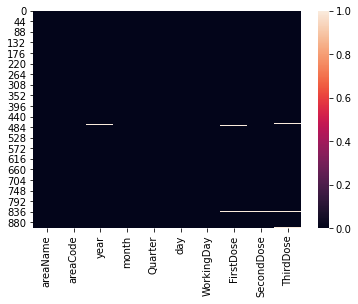

In [12]:
sns.heatmap(data.isnull())

In [13]:
#very small value is missing so we can remove it from data 

In [14]:
data.dropna(inplace=True)

In [15]:
# heatmap after removing missing value 

<AxesSubplot:>

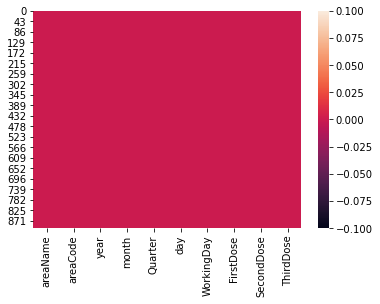

In [16]:
sns.heatmap(data.isnull())

### Q3 Plot the distribution of one or more individual continuous variables and provide comments

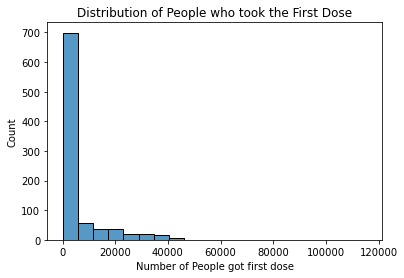

In [17]:
sns.histplot(data['FirstDose'], bins=20)
plt.title('Distribution of People who took the First Dose')
plt.xlabel('Number of People got first dose')
plt.show()



In [18]:
# The distribution is right-skewed, indicating that lower number of people who took the first dose.

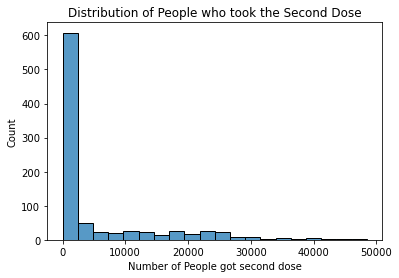

In [19]:
sns.histplot(data['SecondDose'], bins=20)
plt.title('Distribution of People who took the Second Dose')
plt.xlabel('Number of People got second dose')
plt.show()




In [20]:
# The distribution of second doses is similar to the distribution of first doses, but with a slightly higher peak and a longer tail

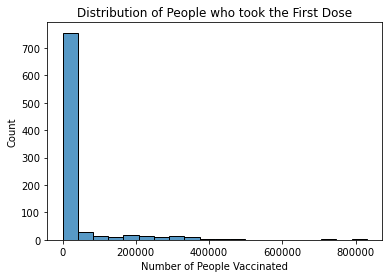

In [21]:
sns.histplot(data['ThirdDose'], bins=20)
plt.title('Distribution of People who took the First Dose')
plt.xlabel('Number of People Vaccinated')
plt.show()




In [22]:
# The distribution of third dose shows the moderate number of people got third doses.

### Q4 Build Scatter visualizing the association b/w two numeric variables and interpret them.

In [23]:
# Create a scatter plot of First Dose vs. Second Dose

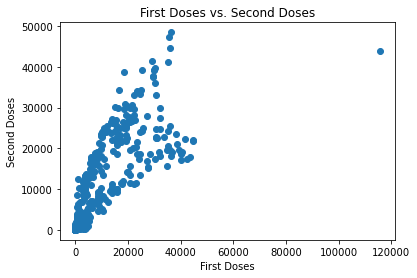

In [24]:
plt.scatter(data['FirstDose'], data['SecondDose'])

# Set the plot title and axis labels
plt.xlabel('First Doses')
plt.ylabel('Second Doses')

plt.title('First Doses vs. Second Doses')

# Show the plot
plt.show()


In [25]:
# This scatter plot shows a strong positive linear relationship between the number of first doses administered and the number of second doses administered. This indicates that as the number of first doses increases, the number of second doses also increases.

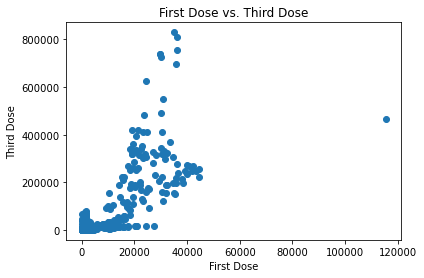

In [26]:
plt.scatter(data['FirstDose'], data['ThirdDose'])
# Set plot title and axis labels

plt.xlabel('First Dose')
plt.ylabel('Third Dose')
plt.title('First Dose vs. Third Dose')

# Show the plot
plt.show()


In [27]:
# We can see that there is also a positive correlation between the two variables, but it is not as strong as the correlation between the first and second doses. This could be due to various factors

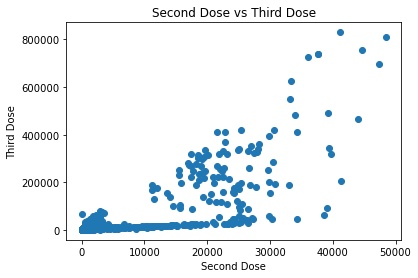

In [28]:
plt.scatter(data['SecondDose'] , data['ThirdDose'])

# Set the plot title and axis labels
plt.xlabel('Second Dose')
plt.ylabel("Third Dose")
plt.title('Second Dose vs Third Dose')

#show plot
plt.show()

In [29]:
# We can see that there is also a positive correlation between the two variables 

### Q5 Visualise the relationship b/w a categorical and a numeric variables, provide comments.

In [30]:
first_dose_by_region = data.groupby('areaName')['FirstDose'].max()
second_dose_by_region = data.groupby('areaName')['SecondDose'].max()
third_dose_by_region = data.groupby('areaName')['ThirdDose'].max()


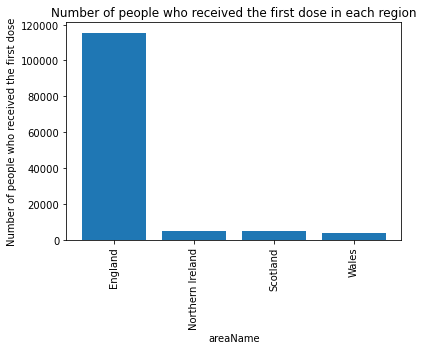

In [31]:
plt.bar(first_dose_by_region.index, first_dose_by_region.values)
plt.xticks(rotation=90)
plt.xlabel('areaName')
plt.ylabel('Number of people who received the first dose')
plt.title('Number of people who received the first dose in each region')
plt.show()


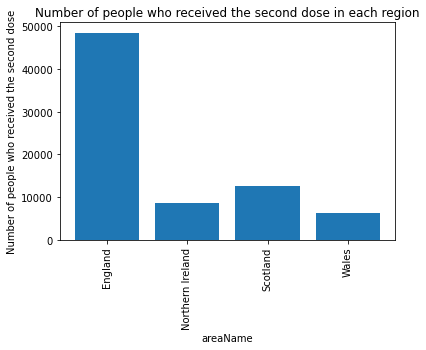

In [32]:
plt.bar(second_dose_by_region.index, second_dose_by_region.values)
plt.xticks(rotation=90)
plt.xlabel('areaName')
plt.ylabel('Number of people who received the second dose')
plt.title('Number of people who received the second dose in each region')
plt.show()


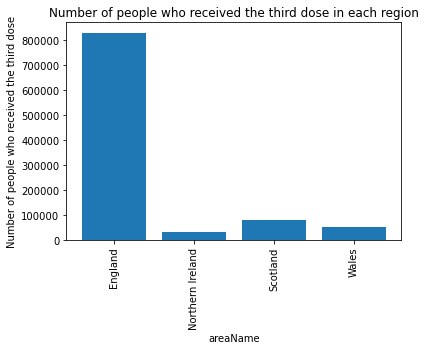

In [33]:
plt.bar(third_dose_by_region.index, third_dose_by_region.values)
plt.xticks(rotation=90)
plt.xlabel('areaName')
plt.ylabel('Number of people who received the third dose')
plt.title('Number of people who received the third dose in each region')
plt.show()


In [34]:
# the bar charts show that England had the highest number of individuals vaccinated across all three doses, followed by the wales and Scotland. The Northern ireland consistently had the lowest number of individuals vaccinated across all three doses.

### Q6 Build a contingency table of two potentially related categorical variables, then conduct a statistical test of the independence between them and interpret the results

In [35]:
# The contingency table shows the frequency counts of each combination of 'areaName' and 'Quarter' in the dataset.

In [36]:
# Create a contingency table of the number of vaccinations administered by region and vaccine manufacturer
cont_table = pd.crosstab(data['areaName'], data['Quarter'])
print(cont_table)



Quarter           Q1  Q2  Q4
areaName                    
England           90  53  92
Northern Ireland  89  53  91
Scotland          90  49  79
Wales             90  48  66


In [37]:
# The numbers in the table represent the frequency of observations falling into each group.
# For example, there were 90 observations in England in Q1, 53 in Q2, and 92 in Q4. 
#Similarly, there were 89 observations in Northern Ireland in Q1, 53 in Q2, and 91 in Q4, and so on.

In [38]:
# the null hypothesis (H0) is assumption that there is no significant difference or relationship between two variables
# the alternative hypothesis (H1) suggesting that there is a significant difference or relationship between the variables.

In [39]:
# Conduct a chi-square test of independence
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(cont_table)

print('Chi-square statistic:', chi2)
print('P-value:', p)




Chi-square statistic: 3.1283095205786853
P-value: 0.7925789480239712


In [40]:
# The Chi-square statistic of 3.1283 and the associated p-value of 0.7926 suggest that 
# there may be a statistically significant association between the 'areaName' and 'Quarter' 
# variables in the vaccination dataset. 

In [41]:
# means H0 is reject
# result are statistically significant 

### Q7 Retrieve one or more subset of rows based on two or more criteria and present descriptive statistics on the subset(s).


In [42]:
# Suppose we want to retrieve the rows for the areaName "England" and the date "Monday and Thursday".

In [43]:
data.loc[(data['areaName'] == 'England') & (data['day'] == 'Mon')]

,areaName,areaCode,year,month,Quarter,day,WorkingDay,FirstDose,SecondDose,ThirdDose
0,England,E92000001,2022.0,5,Q2,Mon,Yes,3034.0,3857.0,8747.0
7,England,E92000001,2022.0,5,Q2,Mon,Yes,4337.0,4893.0,10343.0
14,England,E92000001,2022.0,5,Q2,Mon,Yes,5101.0,6624.0,10965.0
21,England,E92000001,2022.0,5,Q2,Mon,Yes,5043.0,2246.0,3193.0
28,England,E92000001,2022.0,4,Q2,Mon,Yes,7897.0,6803.0,11920.0
35,England,E92000001,2022.0,4,Q2,Mon,Yes,5737.0,3181.0,3957.0
42,England,E92000001,2022.0,4,Q2,Mon,Yes,14014.0,10497.0,14275.0
49,England,E92000001,2022.0,4,Q2,Mon,Yes,8576.0,9319.0,12831.0
56,England,E92000001,2022.0,3,Q1,Mon,Yes,2994.0,9500.0,11974.0
63,England,E92000001,2022.0,3,Q1,Mon,Yes,2925.0,10889.0,14144.0


In [44]:
subset = data.loc[(data['areaName'] == 'England') & (data['day'] == 'Mon')]
subset[['FirstDose', 'SecondDose', 'ThirdDose']].describe()


,FirstDose,SecondDose,ThirdDose
count,34.000000,34.000000,34.000000
mean,14973.382353,16127.264706,116831.147059
std,10751.680889,8396.990158,154850.715847
min,2925.000000,2246.000000,3193.000000
25%,5260.000000,10595.000000,14176.750000
50%,13916.500000,16083.500000,38373.000000
75%,20372.750000,21393.750000,194637.000000
max,36092.000000,44655.000000,753793.000000


In [45]:
data.loc[(data['areaName'] == 'England') & (data['day'] == 'Thu')]

,areaName,areaCode,year,month,Quarter,day,WorkingDay,FirstDose,SecondDose,ThirdDose
4,England,E92000001,2022.0,5,Q2,Thu,Yes,8439.0,6968.0,11701.0
11,England,E92000001,2022.0,5,Q2,Thu,Yes,6829.0,6541.0,11794.0
18,England,E92000001,2022.0,5,Q2,Thu,Yes,7539.0,6703.0,12546.0
25,England,E92000001,2022.0,4,Q2,Thu,Yes,9042.0,7014.0,13136.0
32,England,E92000001,2022.0,4,Q2,Thu,Yes,15770.0,9201.0,13812.0
39,England,E92000001,2022.0,4,Q2,Thu,Yes,20906.0,11444.0,15788.0
46,England,E92000001,2022.0,4,Q2,Thu,Yes,8963.0,9272.0,13339.0
53,England,E92000001,2022.0,3,Q1,Thu,Yes,3530.0,10881.0,13692.0
60,England,E92000001,2022.0,3,Q1,Thu,Yes,3462.0,10559.0,13816.0
67,England,E92000001,2022.0,3,Q1,Thu,Yes,3358.0,12310.0,14950.0


In [46]:
subset = data.loc[(data['areaName'] == 'England') & (data['day'] == 'Thu')]
subset[['FirstDose', 'SecondDose', 'ThirdDose']].describe()

,FirstDose,SecondDose,ThirdDose
count,33.000000,33.000000,33.000000
mean,18256.636364,19530.787879,153693.181818
std,12142.472413,9362.227973,179712.887273
min,3358.000000,6541.000000,11701.000000
25%,8110.000000,11444.000000,14950.000000
50%,15770.000000,19560.000000,42450.000000
75%,25319.000000,26326.000000,274443.000000
max,44558.000000,39755.000000,739867.000000


### Q7  Conduct a statistical test of the significance of the difference between the means of two subsets of the data and interpret the results.

In [47]:
## use t-test to compare the mean of two group

In [48]:
# will compare the mean number of first doses administered in the Northern Ireland region to the
# mean number of first doses administered in the Wales region.

In [49]:
# we will extract the relevant data from the dataset and create two subsets for the north irland and Wales regions:

In [50]:
data["areaName"].value_counts()

England             235
Northern Ireland    233
Scotland            218
Wales               204
Name: areaName, dtype: int64

In [51]:
# H0 The null hypothesis in this case is that the means of the two groups are equal,
# H1 the alternative hypothesis is that they are not equal.

In [52]:
ni_subset = data[data["areaName"] == "Northern Ireland"]
w_subset = data[data["areaName"] == "Wales"]

ni_first_doses = ni_subset["FirstDose"]
w_first_doses = w_subset["FirstDose"]


In [53]:
## mean and standard deviation of the two subsets

In [54]:
ni_men = ni_first_doses.mean()
ni_std = ni_first_doses.std()

w_mean = w_first_doses.mean()
w_std = w_first_doses.std()


In [80]:
from scipy.stats import ttest_ind

t, p = ttest_ind( w_first_doses, ni_first_doses)

print("t-value: ", t)
print("p-value: ", p)


t-value:  2.8942188127423734
p-value:  0.003992205558702076


In [56]:
# we reject the null hypothesis and conclude that there is a significant difference in the average scores of the two groups.

### Q8 Create one or more tables that group the data by a certain categorical variable and display summarized information for each group (e.g. the mean or sum within the group).

In [57]:
# Group the data by areaName and calculate the sum of each variable within each group
grouped = data.groupby(['areaName']).sum()

# Create a table that shows the total number of people who received the first, second, and third dose of the vaccine in each region
table = pd.DataFrame({'FirstDose': grouped['FirstDose'], 'SecondDose': grouped['SecondDose'], 'ThirdDose': grouped['ThirdDose']})
print(table)


                  FirstDose  SecondDose   ThirdDose
areaName                                           
England           3952496.0   4328370.0  32080017.0
Northern Ireland   115116.0    133680.0   1121214.0
Scotland           253443.0    344171.0   3267770.0
Wales              135355.0    176744.0   1668993.0


In [58]:
# We can see that England has the highest number of people who received the first, second, and third dose of the vaccine, followed by the Scotland, the Wales and North Ireland

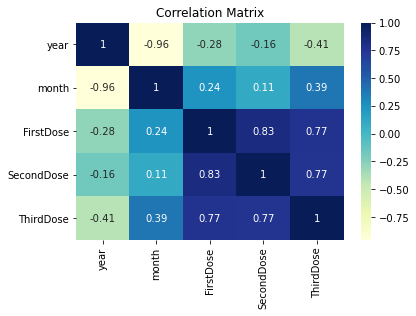

In [59]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Plot the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()


### Q10 Implement a linear regression model and interpret its outputs.

In [60]:
# select the features and target variable

In [61]:
X = data[['FirstDose']]
y = data[['SecondDose']]

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [64]:
# Model selection and Fit

In [65]:
# instantiate the linear regression model
model = LinearRegression()
# fit the model to the data
model.fit(X_train, y_train)

LinearRegression()

In [66]:
# print the coefficients and intercept

In [67]:
y_pred = model.predict(X_test)

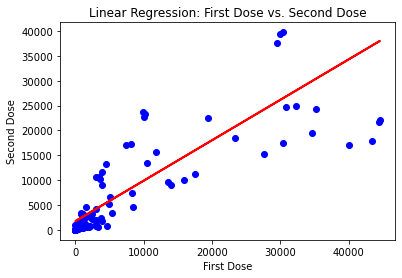

In [68]:
# Plot the regression line
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('First Dose')
plt.ylabel('Second Dose')
plt.title('Linear Regression: First Dose vs. Second Dose')
plt.show()

In [69]:
# print the coefficients and intercept


In [70]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)


Coefficients: [[0.8129261]]
Intercept: [1761.41605503]


In [71]:
 #the coefficient is the slope of the regression line, which represents the change in the dependent variable (y) for a one-unit change in the independent variable (x). 
# In other words, it shows the relationship between the two variables.
 # It represents the starting point of the regression line, where the line crosses the y-axis.

In [72]:
#  the coefficient is 0.8129261, which means that for every unit increase in the first dose, 
# the model predicts an increase of 0.8129261 units in the second dose
# The intercept is 1761.41605503, which represents the predicted value of the second dose when the first dose is equal to 0.

In [73]:

# make predictions on new data
new_data = [[3000]]
predictions = model.predict(new_data)
print('Predictions:', predictions)

Predictions: [[4200.19434998]]


C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [74]:
# Model evaluation

In [75]:
from sklearn.metrics import mean_squared_error, r2_score

In [76]:
# Evaluate the model using MSE, RMSE, and R-squared
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean squared error:", mse)
print("Root mean squared error:", rmse)
print("R-squared:", r2)

Mean squared error: 19674254.621087052
Root mean squared error: 4435.567001081942
R-squared: 0.6709463345420548


In [77]:
# MSE and RMSE are used to measure the difference between the predicted and actual values.

In [78]:
# In this case, the MSE is 19674254.621087052 and the RMSE is 4435.567001081942. 
# These values mean that on average, 
# The predicted values differ from the actual values by about 4435.57.

In [79]:
# R-squared is a measure of how well the linear regression model fits the data.
# The R-squared value ranges from 0 to 1, with higher values indicating a better fit.
# In this case, the R-squared value is 0.6709463345420548,